# Visualization of Phase-Picks at NCI on ISC Events 


##  Fei Zhang

### October 2018

Analyze phase-picking results of ISC events on perm and temp stations 

Visualize seismic events, stations, and rays



In [1]:
import sys
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

In [2]:
# get the pst packages into PYTHONPATH 
# sys.path.append("/Softlab/Githubz/passive-seismic")  

#from seismic.cluster.cluster import Grid2 
#from seismic.traveltime.sort_rays import sort,sort2

In [3]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
   
   
    
    # read infile, tweek below
    in_pdf =  pd.read_csv(csvfile, header='infer')   #  assume there is header line=0; separator = comma,
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  no header line, separator = comma,
    #in_pdf =  pd.read_csv(csvfile,  sep='\s+', header='infer') # white space
  
    # columns you are interested?
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   
    
    # finalpdf = in_pdf[col_names]  # take a subset of columns
    
    return in_pdf  #pandas_data_frame

In [4]:
# OR read in from already sorted (zoned) csv file
#inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_S.csv'
#inputcsv ='/Softlab/travel_time_tomography/CSV_Data/engdahl/outfile_S.csv'


inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/create_input4inversion/s_arrivals_mag_4_and_above_sorted2x2.CSV'
inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/create_input4inversion/temp/temp_station_s_arrivals_sorted1x1.csv'

inputpdf = csv2pdf(inputcsv)

In [5]:
inputpdf.shape

(80939, 24)

In [6]:
inputpdf.head()

,#eventID,originTimestamp,mag,source_lon,source_lat,source_depth_km,net,sta,cha,pickTimestamp,...,tt_residual,snr,bandIndex,source_block,station_block,observed_tt,locations_to_degrees,my_azim,my_bazim,ellipticity_corr
0,smi:ISC/evid=17176125,1.277085e+09,3.7,141.2317,-53.7987,0.0,7W,BL17,BHZ,1.277086e+09,...,5.499421,11.0,0,13243,23487,647.585694,28.890150,344.659968,170.011400,0.235694
1,smi:ISC/evid=17176125,1.277085e+09,3.7,141.2317,-53.7987,0.0,7X,MA44,SHZ,1.277086e+09,...,8.613418,9.8,0,13243,25482,717.961137,33.599145,358.494488,179.050867,0.252237
2,smi:ISC/evid=603989061,1.381702e+09,3.8,143.6980,-53.7715,0.0,7F,CR46,BHZ,1.381703e+09,...,5.104271,10.3,0,13248,21712,557.147567,23.179378,4.182799,182.875425,0.186067
3,smi:ISC/evid=603989061,1.381702e+09,3.8,143.6980,-53.7715,0.0,7D,CZ45,00T,1.381703e+09,...,-6.492484,8.5,0,13248,21900,583.229885,24.070326,12.447496,188.476418,0.195784
4,smi:ISC/evid=607188552,1.426499e+09,3.6,144.4970,-53.7801,0.0,7G,CN44,00T,1.426500e+09,...,2.903986,9.9,0,13250,22068,573.983313,24.079709,358.332233,178.863964,0.194012


In [7]:
inputpdf.columns


Index(['#eventID', 'originTimestamp', 'mag', 'source_lon', 'source_lat',
       'source_depth_km', 'net', 'sta', 'cha', 'pickTimestamp', 'station_lon',
       'station_lat', 'baz', 'distance', 'tt_residual', 'snr', 'bandIndex',
       'source_block', 'station_block', 'observed_tt', 'locations_to_degrees',
       'my_azim', 'my_bazim', 'ellipticity_corr'],
      dtype='object')

In [8]:
# write out ?
# finalpdf.to_csv('/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P2.csv', header=True, index=False, sep=',')

In [9]:
inputpdf[['distance','locations_to_degrees' ]].head(10)

,distance,locations_to_degrees
0,28.860238,28.890150
1,33.540014,33.599145
2,23.164451,23.179378
3,24.055766,24.070326
4,24.061480,24.079709
5,25.115027,25.136272
6,32.276612,32.330560
7,32.419224,32.472767
8,32.516165,32.571103
9,33.981663,34.042583


# Begin to Visualize the data

In [10]:
#  which dataframe to view in the following??
pdf2= inputpdf  #sorted_pdf

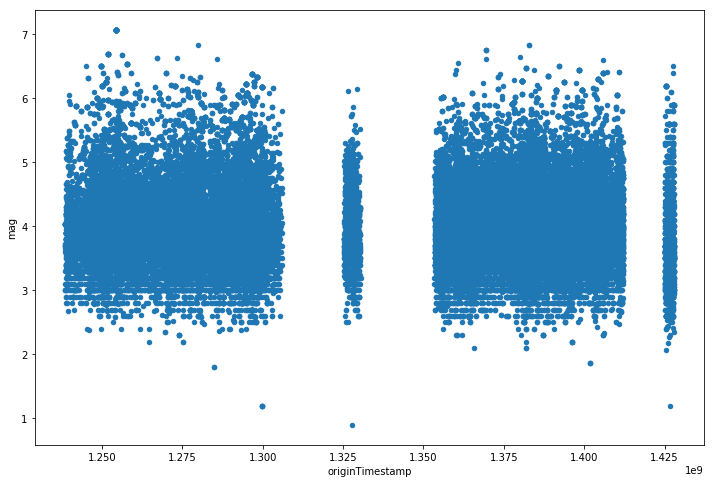

In [11]:


pdf2.plot.scatter(x='originTimestamp', y='mag',figsize=(12,8))

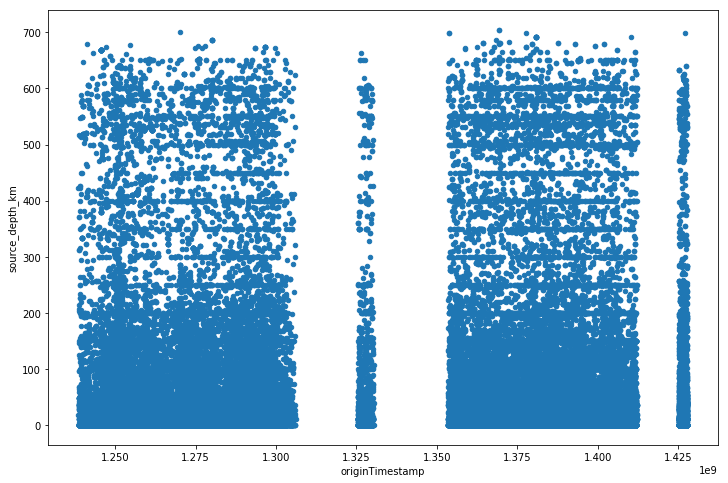

In [12]:
pdf2.plot.scatter(x='originTimestamp', y='source_depth_km',figsize=(12,8))


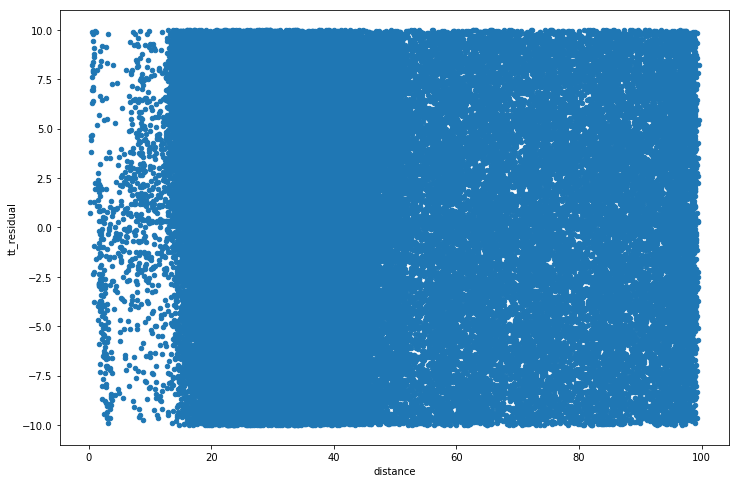

In [13]:
#plt.figure(); 
#pdf2.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))

#pdf2.plot.scatter(x='dist', y='ttResidual',figsize=(12,8))
pdf2.plot.scatter(x='distance', y='tt_residual',figsize=(12,8))

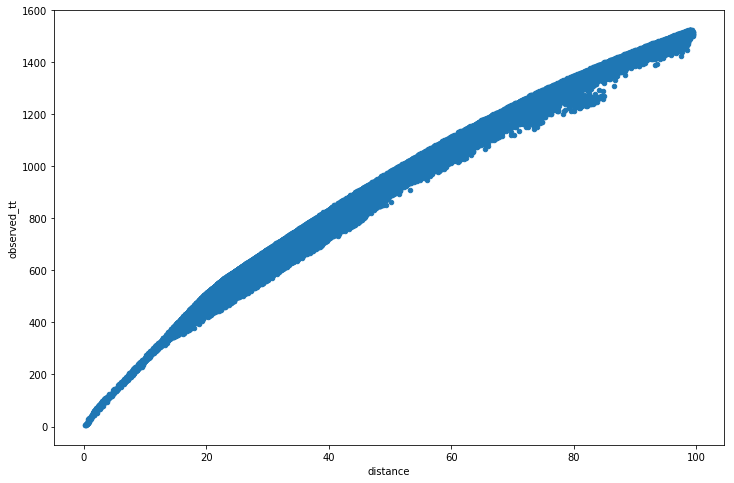

In [14]:
# pdf2['observed_tt'] = pdf2.pickTimestamp - pdf2.originTimestamp

pdf2.plot.scatter(x='distance', y='observed_tt',figsize=(12,8))

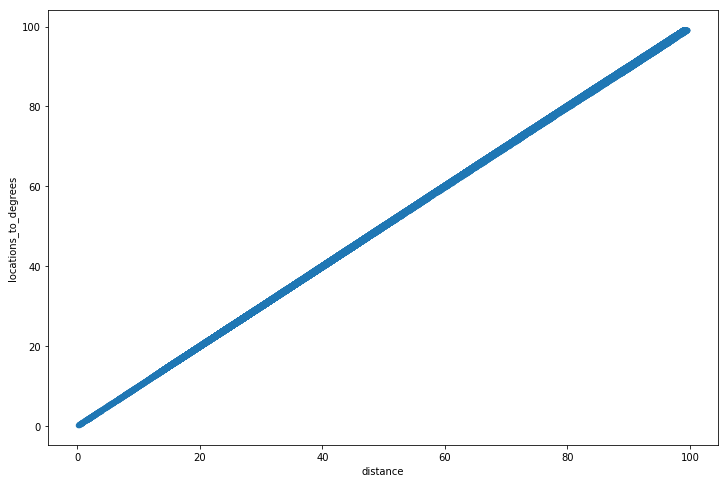

In [15]:
pdf2.plot.scatter(x='distance', y='locations_to_degrees',figsize=(12,8))
#locations_to_degrees,bak_azim,ellipticity_corr

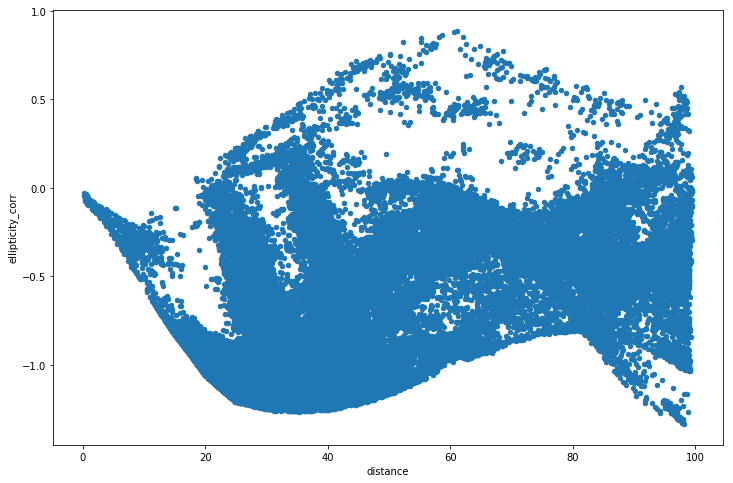

In [16]:
pdf2.plot.scatter(x='distance', y='ellipticity_corr',figsize=(12,8))
#locations_to_degrees,bak_azim,ellipticity_corr

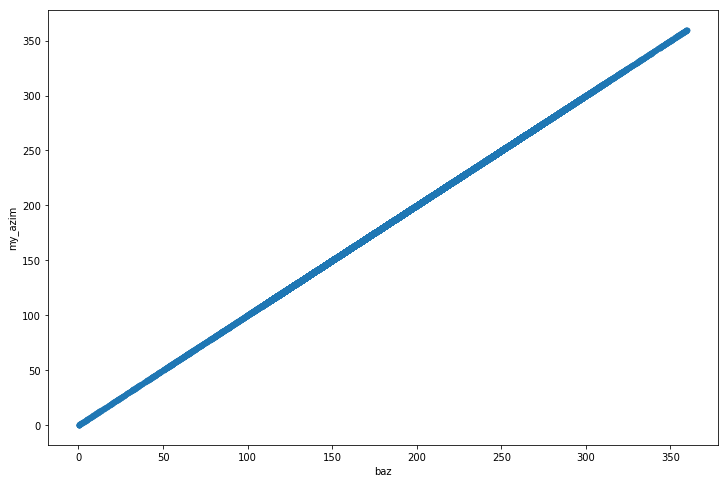

In [17]:
pdf2.plot.scatter(x='baz', y='my_azim',figsize=(12,8))
#locations_to_degrees,,ellipticity_corr

In [18]:
pdf2[['baz', 'my_azim']].head()

,baz,my_azim
0,344.670645,344.659968
1,358.495686,358.494488
2,4.180384,4.182799
3,12.440095,12.447496
4,358.333229,358.332233


In [19]:
# How many events with very shallow depth(KM)?
pdf2[pdf2.source_depth_km<0.1].shape


(17174, 24)

In [20]:

pdf2['source_depth_km'].max()

704.7

In [21]:
pdf2['source_block'].max()

7886800

In [22]:
pdf2['source_block'].min()

13243

In [23]:
pdf2['station_block'].max()

26025

In [24]:
pdf2['station_block'].min()

21151

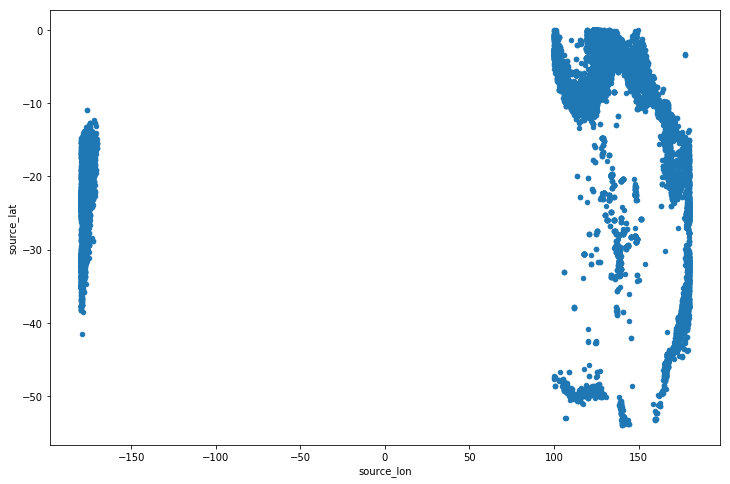

In [25]:
max_blockn = 1948861   #param2x2
max_blockn = 7795441  # param1x1

pdf2region = pdf2[pdf2.source_block <= max_blockn]
pdf2region.plot.scatter(x='source_lon', y='source_lat',figsize=(12,8))

In [26]:
print(pdf2region['source_lon'].min(),pdf2region['source_lon'].max())
print(pdf2region['source_lat'].min(),pdf2region['source_lat'].max())

-179.9995 180.0
-53.9449 0.0


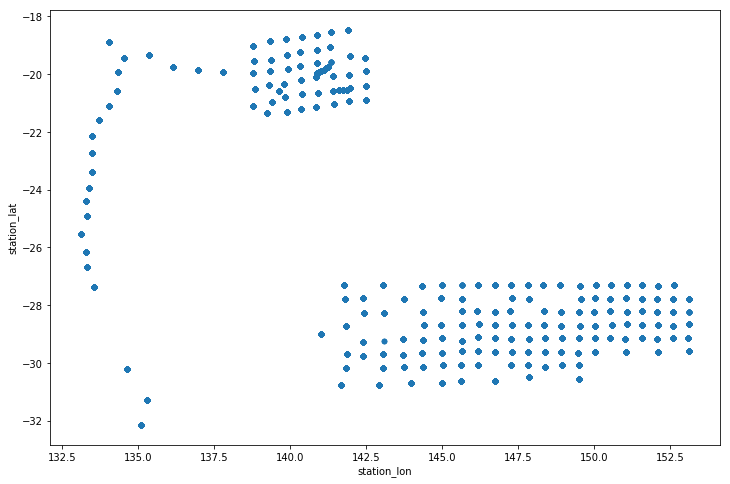

In [27]:
pdf2region = pdf2[pdf2.station_block <= max_blockn]
pdf2region.plot.scatter(x='station_lon', y='station_lat',figsize=(12,8))


In [28]:
print(pdf2region['station_lon'].min(),pdf2region['station_lon'].max())
print(pdf2region['station_lat'].min(),pdf2region['station_lat'].max())

133.1111 153.13048600000005
-32.146 -18.4669


# 1. Python Pandas package plot function (with basemap) 

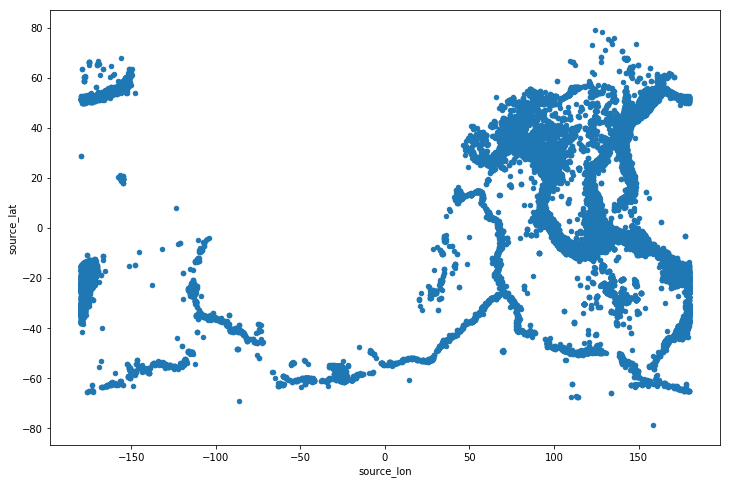

In [29]:
#plt.figure(); 
pdf2.plot.scatter(x='source_lon', y='source_lat',figsize=(12,8))

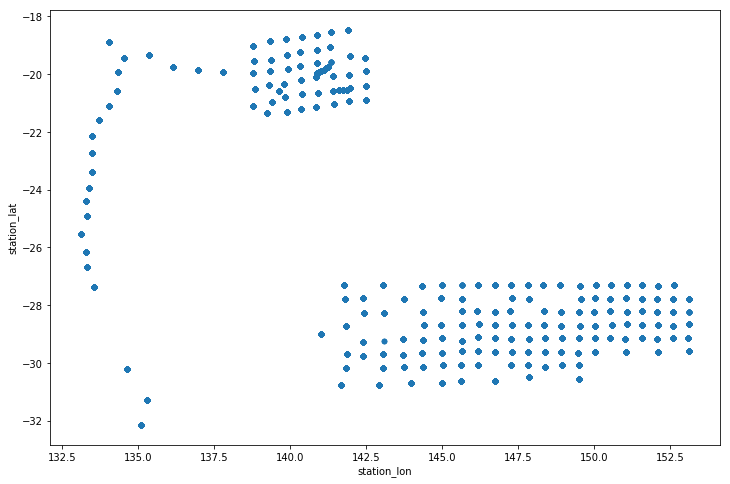

In [30]:
pdf2.plot.scatter(x='station_lon', y='station_lat',figsize=(12,8))

# 3. Geopandas and Maps

In [31]:
import geopandas as gpd

In [32]:
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [33]:
event_locations = [Point(xy) for xy in zip(pdf2.source_lon, pdf2.source_lat)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=event_locations)

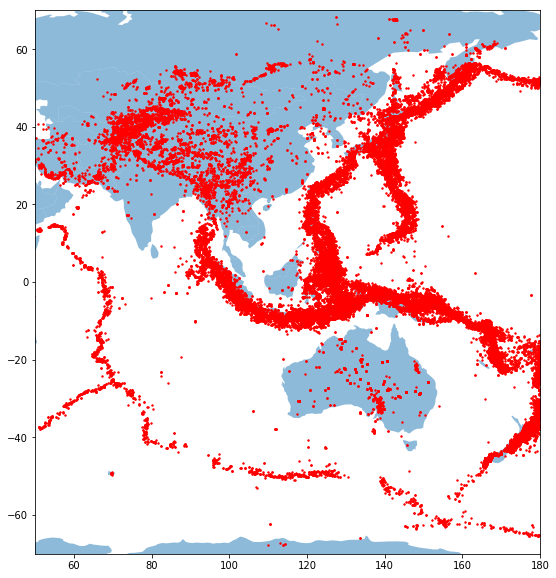

In [34]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([50,180])
myax.set_ylim([-70,70])
              
myax2=geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [35]:
station_locations = [Point(xy) for xy in zip(pdf2.station_lon, pdf2.station_lat)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf['station'] =station_locations

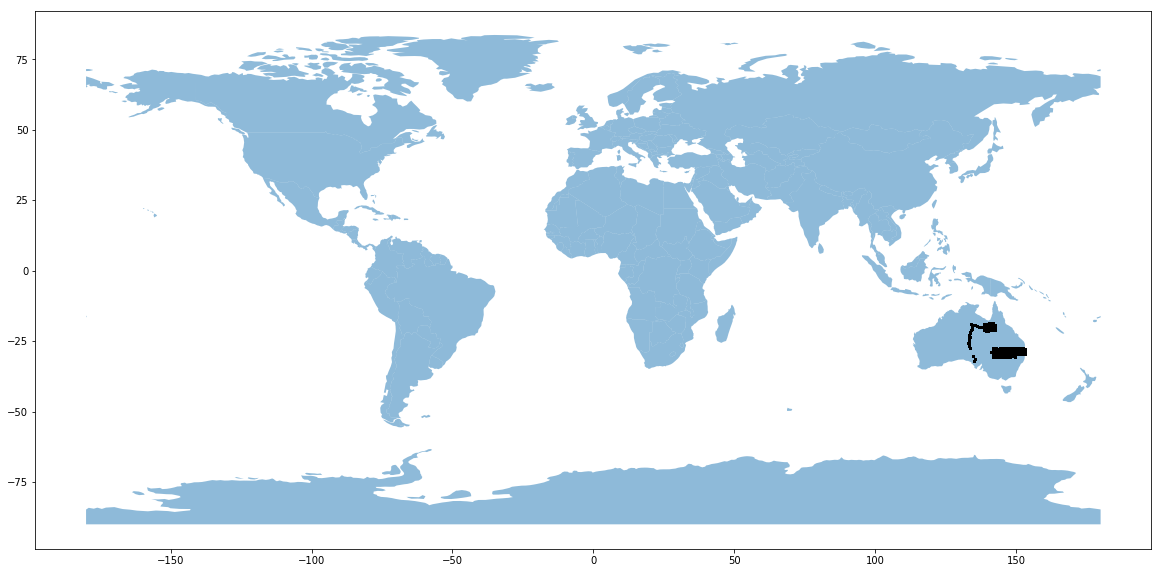

In [36]:
# geopdf.plot(ax=myax2, marker='o', color='red', markersize=2)
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 20))

# myax.set_xlim([-180,180])
# myax.set_ylim([-70,70])
              
geopdf.set_geometry('station').plot(ax=myax, marker='^', color='black', markersize=4);
#geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [37]:
geopdf.geometry.name

'geometry'

In [38]:
geopdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80939 entries, 0 to 80938
Data columns (total 26 columns):
#eventID                80939 non-null object
originTimestamp         80939 non-null float64
mag                     73806 non-null float64
source_lon              80939 non-null float64
source_lat              80939 non-null float64
source_depth_km         80939 non-null float64
net                     80939 non-null object
sta                     80939 non-null object
cha                     80939 non-null object
pickTimestamp           80939 non-null float64
station_lon             80939 non-null float64
station_lat             80939 non-null float64
baz                     80939 non-null float64
distance                80939 non-null float64
tt_residual             80939 non-null float64
snr                     80939 non-null float64
bandIndex               80939 non-null int64
source_block            80939 non-null int64
station_block           80939 non-null int64


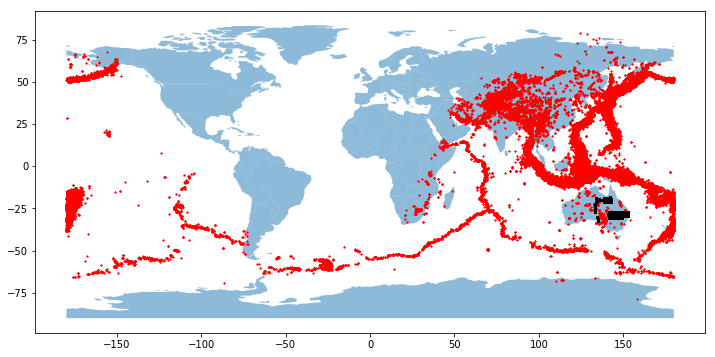

In [39]:
# composing two layers in a map
f, ax = plt.subplots(1, figsize=(12, 6))
# Add layer of polygons on the axis
world.plot(ax=ax, alpha=0.5,  figsize=(20, 20))

geopdf.plot(ax=ax, marker='*', color='red', markersize=2)
geop2= geopdf.set_geometry('station')
geop2.plot(ax=ax, marker='^', color='black', markersize=4)
plt.savefig('Swave_events_stations.png')

# Display
#plt.show()

In [40]:
geopdf.head()

,#eventID,originTimestamp,mag,source_lon,source_lat,source_depth_km,net,sta,cha,pickTimestamp,...,bandIndex,source_block,station_block,observed_tt,locations_to_degrees,my_azim,my_bazim,ellipticity_corr,geometry,station
0,smi:ISC/evid=17176125,1.277085e+09,3.7,141.2317,-53.7987,0.0,7W,BL17,BHZ,1.277086e+09,...,0,13243,23487,647.585694,28.890150,344.659968,170.011400,0.235694,POINT (141.2317 -53.7987),POINT (133.1111 -25.5487)
1,smi:ISC/evid=17176125,1.277085e+09,3.7,141.2317,-53.7987,0.0,7X,MA44,SHZ,1.277086e+09,...,0,13243,25482,717.961137,33.599145,358.494488,179.050867,0.252237,POINT (141.2317 -53.7987),POINT (140.3468 -20.2064)
2,smi:ISC/evid=603989061,1.381702e+09,3.8,143.6980,-53.7715,0.0,7F,CR46,BHZ,1.381703e+09,...,0,13248,21712,557.147567,23.179378,4.182799,182.875425,0.186067,POINT (143.698 -53.7715),POINT (145.604496 -30.633132)
3,smi:ISC/evid=603989061,1.381702e+09,3.8,143.6980,-53.7715,0.0,7D,CZ45,00T,1.381703e+09,...,0,13248,21900,583.229885,24.070326,12.447496,188.476418,0.195784,POINT (143.698 -53.7715),POINT (149.512009 -30.073473)
4,smi:ISC/evid=607188552,1.426499e+09,3.6,144.4970,-53.7801,0.0,7G,CN44,00T,1.426500e+09,...,0,13250,22068,573.983313,24.079709,358.332233,178.863964,0.194012,POINT (144.497 -53.7801),POINT (143.715968 -29.707088)


In [41]:
# output required csv txt file for inversion program

# phase='P'
# final_df=pdf2

# if phase =='P':
#     final_df['P_or_S'] =1
# elif phase =='S':
#     final_df['P_or_S'] = 2
# else:
#     raise Exception("Phase must be P or S !!!")
    
# final_df['event_number'] = final_df.apply(lambda x: int(x.originTimestamp), axis=1)


# required_columns = ['source_block', 'station_block', 'tt_residual', 'event_number',
#              'source_lon', 'source_lat', 'source_depth_km',
#              'station_lon', 'station_lat', 'observed_tt', 'locations_to_degrees',  'P_or_S']


# pdf4inv = final_df[required_columns]

# inv_txt = "%s.inv_txt" % 'outputcsv'
# pdf4inv.to_csv(inv_txt,header=False, index=False, sep=' ')  # space delimitted txt file


In [42]:
# stop

# Plot Arrival Rays (takes a few minutes to run)

In [43]:
pdf3 = pdf2.loc[(pdf2.source_block <= max_blockn) & (pdf2.station_block <= max_blockn) ]
mycrs = {'init': 'epsg:4326'}  # WGS84

#geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

pdf3['ray']= pdf3.apply(lambda x: LineString([(x.source_lon, x.source_lat), 
                (x.station_lon, x.station_lat)]), axis=1)


geopdf_ray = gpd.GeoDataFrame(pdf3, crs=mycrs, geometry='ray')

/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


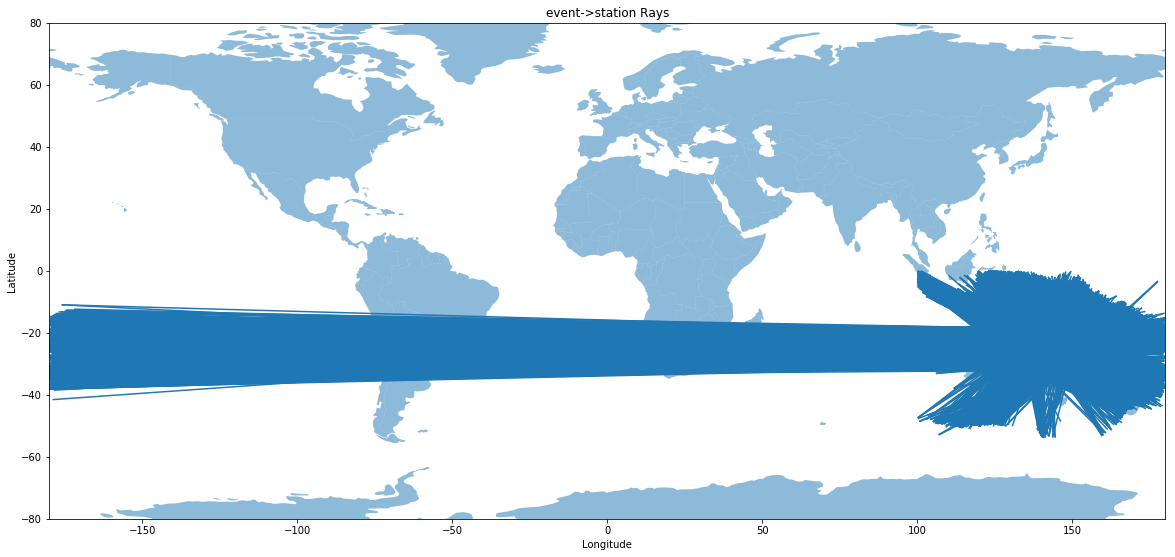

In [44]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mymap=world.plot(alpha=0.5,  figsize=(20, 20))

mymap.set_xlim([-180,180])
mymap.set_ylim([-80,80])

# mymap.set_xlim([50,180])
# mymap.set_ylim([-70,70])

mymap.set_xlabel('Longitude')
mymap.set_ylabel('Latitude')
title_str= "event->station Rays"
mymap.set_title(title_str)

geopdf_ray.plot(ax=mymap)

In [45]:
geopdf_ray.shape

(48322, 27)